In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("train.csv")
tdf1= pd.read_csv("test.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
tdf1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df2 = df1.copy()
df2 = df2.drop(['Cabin','Ticket','PassengerId'],axis='columns')
df2['Age']=df2['Age'].fillna(df2['Age'].median())
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [6]:
tdf2=tdf1.copy()
tdf2= tdf2.drop(['Cabin','Ticket','PassengerId'], axis='columns')
tdf2['Age']=tdf2['Age'].fillna(tdf2['Age'].median())
tdf2.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [7]:
df2['Embarked'].mode()

0    S
dtype: object

In [8]:
df2.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
df2['Embarked']=df2['Embarked'].fillna(df2['Embarked'].mode()[0])
df2.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

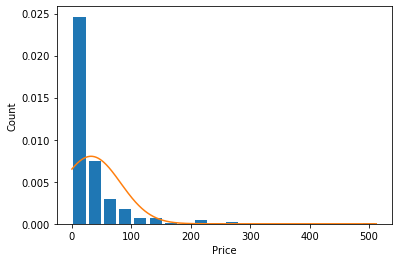

In [10]:
from scipy.stats import norm
import numpy as np

plt.hist(df2['Fare'], bins=20, rwidth=0.8, density= True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(df2['Fare'].min(), df2['Fare'].max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2['Fare'].mean(),df2['Fare'].std()))

In [11]:
tdf2['Fare']=tdf2['Fare'].fillna(df2['Fare'].median())
tdf2.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
396,3,"Colbert, Mr. Patrick",male,24.0,0,0,7.2500,Q
248,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26.0000,S
223,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,7.7958,S
416,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S
211,3,"Finoli, Mr. Luigi",male,27.0,0,0,7.0500,S


In [12]:
tdf2.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df3 = df2.copy()
df3['Family'] = df3['SibSp']+df3['Parch'] + 1
df3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [14]:
tdf3 = tdf2.copy()
tdf3['Family'] = tdf3['SibSp']+tdf3['Parch']
tdf3

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0
416,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,0


In [15]:
df3['Title'] = df3['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Mr


In [16]:
tdf3['Title'] = tdf3['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
tdf3

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,0,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,Mr
416,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,0,Mr


In [17]:
df4 = df3.copy()
df4 = df4.drop(['SibSp','Parch'], axis='columns')
df4['Farebin'] = pd.qcut(df4['Fare'], 4)
df4['Agebin'] = pd.qcut(df4['Age'], 4)
df4

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family,Title,Farebin,Agebin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr,"(-0.001, 7.91]","(0.419, 22.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs,"(31.0, 512.329]","(35.0, 80.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss,"(7.91, 14.454]","(22.0, 28.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs,"(31.0, 512.329]","(28.0, 35.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr,"(7.91, 14.454]","(28.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev,"(7.91, 14.454]","(22.0, 28.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss,"(14.454, 31.0]","(0.419, 22.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss,"(14.454, 31.0]","(22.0, 28.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr,"(14.454, 31.0]","(22.0, 28.0]"


In [18]:
tdf4 = tdf3.copy()
tdf4 = tdf4.drop(['SibSp','Parch'], axis='columns')
tdf4['Farebin'] = pd.qcut(tdf4['Fare'], 4)
tdf4['Agebin'] = pd.qcut(tdf4['Age'], 4)
tdf4

,Pclass,Name,Sex,Age,Fare,Embarked,Family,Title,Farebin,Agebin
0,3,"Kelly, Mr. James",male,34.5,7.8292,Q,0,Mr,"(-0.001, 7.896]","(27.0, 35.75]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,1,Mrs,"(-0.001, 7.896]","(35.75, 76.0]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,0,Mr,"(7.896, 14.454]","(35.75, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,0,Mr,"(7.896, 14.454]","(23.0, 27.0]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,2,Mrs,"(7.896, 14.454]","(0.169, 23.0]"
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27.0,8.0500,S,0,Mr,"(7.896, 14.454]","(23.0, 27.0]"
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,0,Dona,"(31.472, 512.329]","(35.75, 76.0]"
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,S,0,Mr,"(-0.001, 7.896]","(35.75, 76.0]"
416,3,"Ware, Mr. Frederick",male,27.0,8.0500,S,0,Mr,"(7.896, 14.454]","(23.0, 27.0]"


In [19]:
df5 = df4.copy()
title_names = (df5['Title'].value_counts() < 10)
df5['Title'] = df5['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
df5['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)

In [20]:
tdf5 = tdf4.copy()
title_names = (tdf5['Title'].value_counts() < 10)
tdf5['Title'] = tdf5['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
tdf5['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)

In [21]:
df6= df5.copy()
df6 = pd.get_dummies(df6, prefix=['Sex'], columns=['Sex']) 
df6 = pd.get_dummies(df6, columns=['Title'])
df6 = pd.get_dummies(df6, columns=['Embarked'])
df6 = pd.get_dummies(df6, columns=['Farebin'])
df6 = pd.get_dummies(df6, columns=['Agebin'])
df6

,Survived,Pclass,Name,Age,Fare,Family,Sex_female,Sex_male,Title_Master,Title_Misc,...,Embarked_Q,Embarked_S,"Farebin_(-0.001, 7.91]","Farebin_(7.91, 14.454]","Farebin_(14.454, 31.0]","Farebin_(31.0, 512.329]","Agebin_(0.419, 22.0]","Agebin_(22.0, 28.0]","Agebin_(28.0, 35.0]","Agebin_(35.0, 80.0]"
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,2,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,2,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,13.0000,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
887,1,1,"Graham, Miss. Margaret Edith",19.0,30.0000,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,23.4500,4,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
889,1,1,"Behr, Mr. Karl Howell",26.0,30.0000,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
tdf6= tdf5.copy()
tdf6 = pd.get_dummies(tdf6, prefix=['Sex'], columns=['Sex']) 
tdf6 = pd.get_dummies(tdf6, columns=['Title'])
tdf6 = pd.get_dummies(tdf6, columns=['Embarked'])
tdf6 = pd.get_dummies(tdf6, columns=['Farebin'])
tdf6 = pd.get_dummies(tdf6, columns=['Agebin'])
tdf6

,Pclass,Name,Age,Fare,Family,Sex_female,Sex_male,Title_Master,Title_Misc,Title_Miss,...,Embarked_Q,Embarked_S,"Farebin_(-0.001, 7.896]","Farebin_(7.896, 14.454]","Farebin_(14.454, 31.472]","Farebin_(31.472, 512.329]","Agebin_(0.169, 23.0]","Agebin_(23.0, 27.0]","Agebin_(27.0, 35.75]","Agebin_(35.75, 76.0]"
0,3,"Kelly, Mr. James",34.5,7.8292,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,7.0000,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,9.6875,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,3,"Wirz, Mr. Albert",27.0,8.6625,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,12.2875,2,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",27.0,8.0500,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
414,1,"Oliva y Ocana, Dona. Fermina",39.0,108.9000,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
415,3,"Saether, Mr. Simon Sivertsen",38.5,7.2500,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
416,3,"Ware, Mr. Frederick",27.0,8.0500,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [23]:
x = df6.copy()
x = x.drop(['Age','Name','Fare','Survived'], axis= 'columns')
x

,Pclass,Family,Sex_female,Sex_male,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S,"Farebin_(-0.001, 7.91]","Farebin_(7.91, 14.454]","Farebin_(14.454, 31.0]","Farebin_(31.0, 512.329]","Agebin_(0.419, 22.0]","Agebin_(22.0, 28.0]","Agebin_(28.0, 35.0]","Agebin_(35.0, 80.0]"
0,3,2,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
1,1,2,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,3,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4,3,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
887,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
888,3,4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
889,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0


In [24]:
tdf7 = tdf6.copy()
tdf7 = tdf7.drop(['Age','Name','Fare'], axis= 'columns')
tdf7

,Pclass,Family,Sex_female,Sex_male,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S,"Farebin_(-0.001, 7.896]","Farebin_(7.896, 14.454]","Farebin_(14.454, 31.472]","Farebin_(31.472, 512.329]","Agebin_(0.169, 23.0]","Agebin_(23.0, 27.0]","Agebin_(27.0, 35.75]","Agebin_(35.75, 76.0]"
0,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
1,3,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
2,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4,3,2,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
414,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
415,3,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
416,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [25]:
y = df6['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [28]:
len(x_test)

223

In [29]:
len(x_train)

668

### Visualization of Data

In [30]:
a1 = pd.crosstab(df5['Survived'],df5['Sex'], normalize='columns')
a1

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [31]:
a2 = pd.crosstab(df5['Survived'],df5['Pclass'], normalize='columns')
a2

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [32]:
a3 = pd.crosstab(df5['Survived'],df5['Embarked'], normalize='columns')
a3

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.660991
1,0.553571,0.38961,0.339009


In [33]:
a4 = pd.crosstab(df5['Survived'],df5['Family'], normalize='columns')
a4

Family,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


In [34]:
a5 = pd.crosstab(df5['Survived'],df5['Title'], normalize='columns')
a5

Title,Master,Misc,Miss,Mr,Mrs
Survived,,,,,
0,0.425,0.555556,0.302198,0.843327,0.208
1,0.575,0.444444,0.697802,0.156673,0.792


### Linear Regression

In [35]:
#Linear Regression

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.48777664853031666

### Decision Tree Classifier

In [36]:
#Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test, y_test)

0.8116591928251121

In [37]:
#Bagging on Decision Tree

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 50)
bg.fit(x_train,y_train)
bg.score(x_test,y_test)

0.8340807174887892

In [38]:
#Boosting on Decision Tree

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 100, learning_rate = 0.009)
adb.fit(x_train,y_train)
adb.score(x_test,y_test)

0.8026905829596412

### Random Forest 

In [39]:
#Random Forest Classifier 

rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8161434977578476

In [40]:
#Bagging on Random Forest

bg = BaggingClassifier(RandomForestClassifier(n_estimators=20), max_samples= 0.5, max_features = 1.0, n_estimators = 50)
bg.fit(x_train,y_train)
bg.score(x_test,y_test)

0.8565022421524664

In [41]:
#Boosting on Random Forest

adb = AdaBoostClassifier(RandomForestClassifier(n_estimators=20),n_estimators = 100, learning_rate = 0.009)
adb.fit(x_train,y_train)
adb.score(x_test,y_test)

0.820627802690583

In [63]:
import sys
!{sys.executable} -m pip install xgboost

### Machine Learning Algorithms - Table

In [161]:
import scipy as sp
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier

N1 = 100
N2 = 50

MLA = [
    
    #Ensemble Methods
    AdaBoostClassifier(n_estimators=N1),
    BaggingClassifier(n_estimators=N1),
    ExtraTreesClassifier(n_estimators=N1),
    GradientBoostingClassifier(n_estimators=N1),
    RandomForestClassifier(n_estimators=N1),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegressionCV(cv=N2),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    #Navies Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(gamma='scale', probability=True),
    NuSVC(gamma='scale', probability=True),
    LinearSVC(dual=False),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    #Discriminant Analysis
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    
    ]

In [162]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time


In [163]:
MLA_predict = y.copy()
MLA_predict

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [164]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

cv_split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 5 )

row_index=0
for alg in MLA:
    
    #set Name
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    #set Parameters
    MLA_compare.loc[row_index, 'MLA Parameters'] =  str(alg.get_params())
    
    #Score Validation    
    cv_results = cross_validate(alg, x, y, cv  = cv_split)
    
    #The time for fitting the estimator on the train set for each cv split.
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean().round(5)
    
    #The score array for train scores on each cv split.
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    
    #The score array for test scores on each cv split.
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean().round(4) 
    
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
       
    alg.fit(x, y)
    #MLA_predict['MLA_name'] =  alg.predict(y)  
    
    row_index+=1   


D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Softwares\Anaconda\lib\site-packages\

In [165]:
MLA_compare = MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.8363,0.0732536,0.04639
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.8318,0.0643072,0.00241
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.83,0.0695009,0.00469
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.8278,0.0719951,0.00848
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.826,0.0904052,0.06236
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 50, 'du...",0.8229,0.0511388,2.70221
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.8157,0.0637986,0.21977
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.813,0.0680803,0.11499
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.8085,0.0541636,0.00292
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.8072,0.0531348,0.06643


Text(0, 0.5, 'Algorithm')

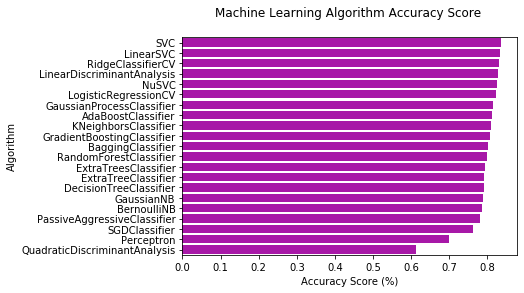

In [166]:
import seaborn as sn
sn.barplot(x ='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')